In [2]:
from xgboost import XGBRegressor

from optuna.visualization import plot_optimization_history, plot_intermediate_values


# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

import numpy as np
from sklearn.model_selection import cross_val_score

from code.wrapper import utils

import seaborn as sns
import optuna

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
# https://stackoverflow.com/a/23835410

excel_sheet = pd.read_excel("../Data/New/unfiltered_data.xlsx", sheet_name=["full_train", "full_test",
                                                                            "ionizable_train", "ionizable_test",
                                                                            "neutral_train", "neutral_test"])


full_train: pd.DataFrame = excel_sheet["full_train"]
full_test: pd.DataFrame = excel_sheet["full_test"]

neutral_train: pd.DataFrame = excel_sheet["neutral_train"]
neutral_test: pd.DataFrame = excel_sheet["neutral_test"]

ionizable_train: pd.DataFrame = excel_sheet["ionizable_train"]
ionizable_test: pd.DataFrame = excel_sheet["ionizable_test"]

Scaler = RobustScaler()
Norm = Normalizer()
# TRAIN
X_full_train = full_train.loc[:, full_train.columns != "Log_MP_RATIO"]
y_full_train = full_train["Log_MP_RATIO"]


X_neutral_train = neutral_train.loc[:, neutral_train.columns != "Log_MP_RATIO"]
y_neutral_train = neutral_train["Log_MP_RATIO"]

X_ionizable_train = ionizable_train.loc[:, ionizable_train.columns != "Log_MP_RATIO"]
y_ionizable_train = ionizable_train["Log_MP_RATIO"]
# Scaler.fit(X_full_train)
# X_full_train = pd.DataFrame(Scaler.transform(X_full_train), columns = X_full_train.columns)
#
# Norm.fit(X_full_train)
# X_full_train = pd.DataFrame(Norm.transform(X_full_train), columns=X_full_train.columns)

# TEST
X_full_test = full_test.loc[:, full_test.columns != "Log_MP_RATIO"]
y_full_test = full_test["Log_MP_RATIO"]

X_neutral_test = neutral_test.loc[:, neutral_test.columns != "Log_MP_RATIO"]
y_neutral_test = neutral_test["Log_MP_RATIO"]

X_ionizable_test = ionizable_test.loc[:, ionizable_test.columns != "Log_MP_RATIO"]
y_ionizable_test = ionizable_test["Log_MP_RATIO"]
#
# Scaler.fit(X_full_test)
# X_full_test = pd.DataFrame(Scaler.transform(X_full_test), columns = X_full_test.columns)
#
# Norm.fit(X_full_test)
# X_full_test = pd.DataFrame(Norm.transform(X_full_test), columns=X_full_test.columns)

# Full

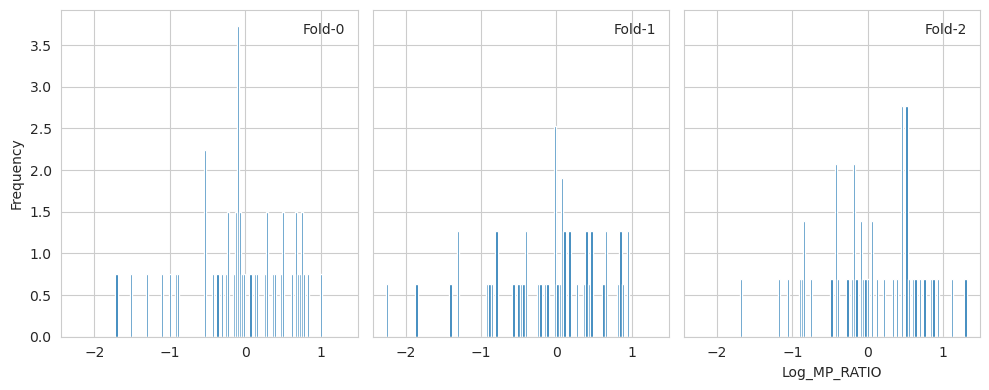

[10:26:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[10:26:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[10:26:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[10:26:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[10:26:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[10:26:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[10:26:39] WARNING: /home/conda/feedstock_root

In [4]:
test_utils = utils.Utils(full_train)
test_utils.create_cv_folds(display=True)
test_utils.display_score(XGBRegressor(max_iter=100000, random_state=0), X_full_train, y_full_train, X_full_test, y_full_test)

In [6]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
    }



    clf = XGBRegressor(random_state=0, **param)
    # n_ft = trial.suggest_int('n_ft', 1, 10, log=True)
    # clf = RFE(Ridge(max_iter=100000, alpha=alpha, solver=solver), n_features_to_select=n_ft)

    estimator = utils.Utils(full_train)
    return estimator.cross_value_score(clf)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000, n_jobs=-1, show_progress_bar=True)
trial = study.best_trial
print(trial.value, trial.params)

[I 2023-06-19 10:27:21,927] A new study created in memory with name: no-name-451af996-f20a-4581-829b-ff4100d387fa


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2023-06-19 10:27:24,408] Trial 2 finished with value: 0.47051163128137136 and parameters: {'max_depth': 2, 'learning_rate': 0.22601110608476666, 'n_estimators': 58, 'min_child_weight': 9, 'gamma': 0.7843585073085804, 'subsample': 0.8560441741475447, 'colsample_bytree': 0.37924658209208517, 'reg_alpha': 0.2140912891880075, 'reg_lambda': 0.3176400138472094}. Best is trial 2 with value: 0.47051163128137136.
[I 2023-06-19 10:27:27,106] Trial 1 finished with value: 0.19434204992695403 and parameters: {'max_depth': 3, 'learning_rate': 0.8468292092098978, 'n_estimators': 132, 'min_child_weight': 7, 'gamma': 0.5584337772926342, 'subsample': 0.8594780379680144, 'colsample_bytree': 0.6245829104624528, 'reg_alpha': 0.5988886156674234, 'reg_lambda': 0.8640161747388869}. Best is trial 2 with value: 0.47051163128137136.
[I 2023-06-19 10:27:27,841] Trial 8 finished with value: -0.7650050605091009 and parameters: {'max_depth': 1, 'learning_rate': 0.8071543949396806, 'n_estimators': 100, 'min_child_

Scores: 
	R2				:	 0.9906918452802257 
	CV train		:	 0.502611995036475 
	Custom CV train	:	 0.5898555789636416 
	Q2				:	 -0.09051993504074685


/home/penpen/Documents/Cours/Stage/QSAR/code/wrapper/utils.py:228: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.



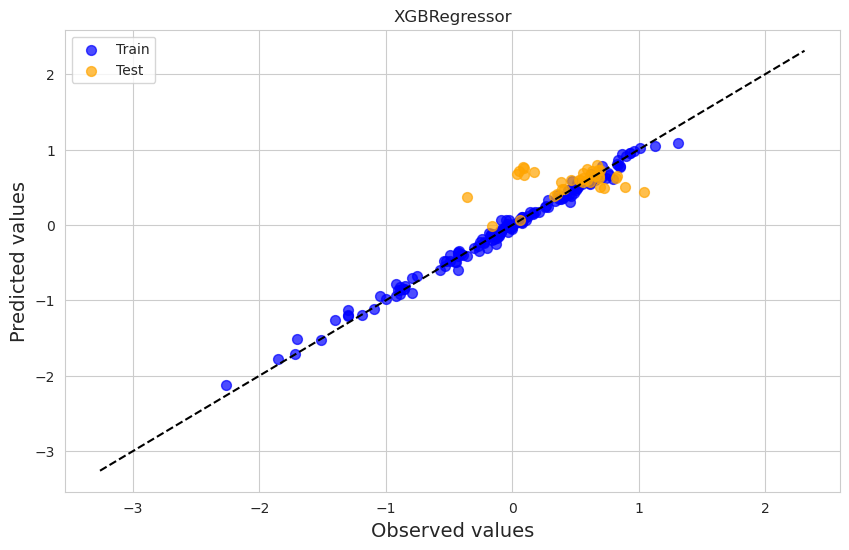

In [7]:
test_utils.display_score(XGBRegressor(**study.best_params, random_state=0), X_full_train, y_full_train, X_full_test, y_full_test)
display(plot_optimization_history(study))

rr = XGBRegressor(**study.best_params, random_state=0).fit(X_full_train, y_full_train)

test_utils.display_graph(rr, X_full_train, X_full_test, y_full_train, y_full_test)

# Ionizable

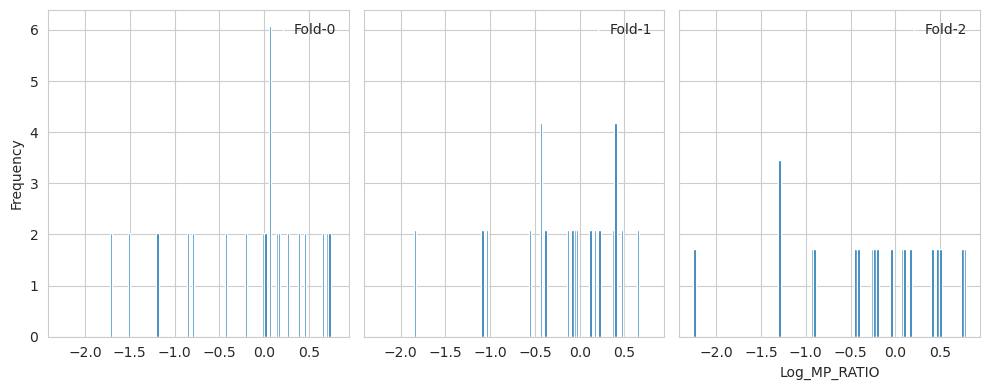

[11:49:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[11:49:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[11:49:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[11:49:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[11:49:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[11:49:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[11:49:54] WARNING: /home/conda/feedstock_root

In [8]:
test_utils = utils.Utils(ionizable_train)
test_utils.create_cv_folds(display=True)
test_utils.display_score(XGBRegressor(max_iter=100000, random_state=0), X_ionizable_train, y_ionizable_train, X_ionizable_test, y_ionizable_test)

In [9]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
    }



    clf = XGBRegressor(random_state=0, **param)
    
    estimator = utils.Utils(ionizable_train)
    return estimator.cross_value_score(clf)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000, n_jobs=-1, show_progress_bar=True)
trial = study.best_trial
print(trial.value, trial.params)

[I 2023-06-19 11:50:38,055] A new study created in memory with name: no-name-5ec3693b-23b5-4655-afb6-cf6a4a46f2ba


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2023-06-19 11:50:44,005] Trial 6 finished with value: 0.2307951404173404 and parameters: {'max_depth': 1, 'learning_rate': 0.8526084970614689, 'n_estimators': 179, 'min_child_weight': 6, 'gamma': 0.5652506600433503, 'subsample': 0.1473690062606345, 'colsample_bytree': 0.7871356990401326, 'reg_alpha': 0.5198622196352238, 'reg_lambda': 0.2890197324807803}. Best is trial 6 with value: 0.2307951404173404.
[I 2023-06-19 11:50:44,093] Trial 2 finished with value: 0.2200038131306152 and parameters: {'max_depth': 5, 'learning_rate': 0.08025496563292196, 'n_estimators': 176, 'min_child_weight': 2, 'gamma': 0.32212340791976124, 'subsample': 0.2502303390841021, 'colsample_bytree': 0.06259368014880022, 'reg_alpha': 0.22499129241826482, 'reg_lambda': 0.15600212262030277}. Best is trial 6 with value: 0.2307951404173404.
[I 2023-06-19 11:50:49,279] Trial 5 finished with value: -324928652.5668394 and parameters: {'max_depth': 6, 'learning_rate': 0.9411541316412121, 'n_estimators': 347, 'min_child_w

Scores: 
	R2				:	 0.9088646762756474 
	CV train		:	 0.4744911705371549 
	Custom CV train	:	 0.6472508092134758 
	Q2				:	 -0.23550369979074737


/home/penpen/Documents/Cours/Stage/QSAR/code/wrapper/utils.py:228: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.



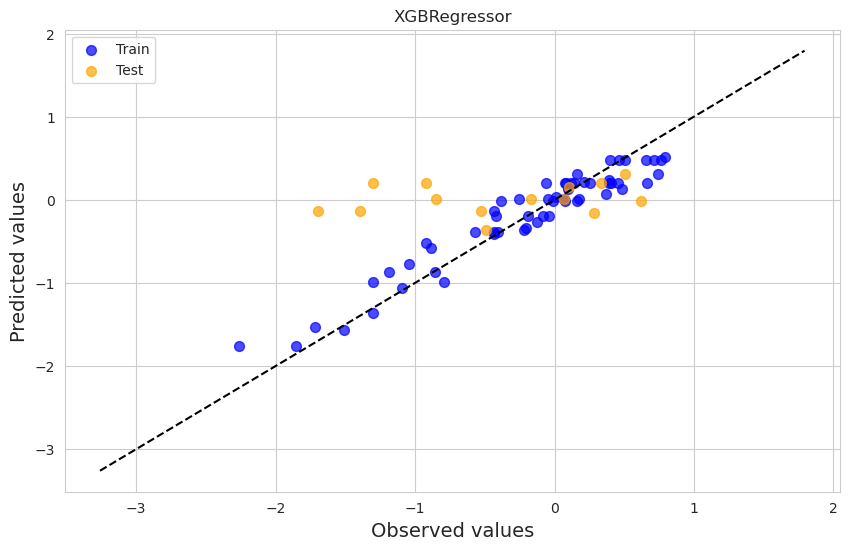

In [10]:
test_utils.display_score(XGBRegressor(**study.best_params, random_state=0), X_ionizable_train, y_ionizable_train, X_ionizable_test, y_ionizable_test)
display(plot_optimization_history(study))

rr = XGBRegressor(**study.best_params, random_state=0).fit(X_ionizable_train, y_ionizable_train)

test_utils.display_graph(rr, X_ionizable_train, X_ionizable_test, y_ionizable_train, y_ionizable_test)

# Neutral

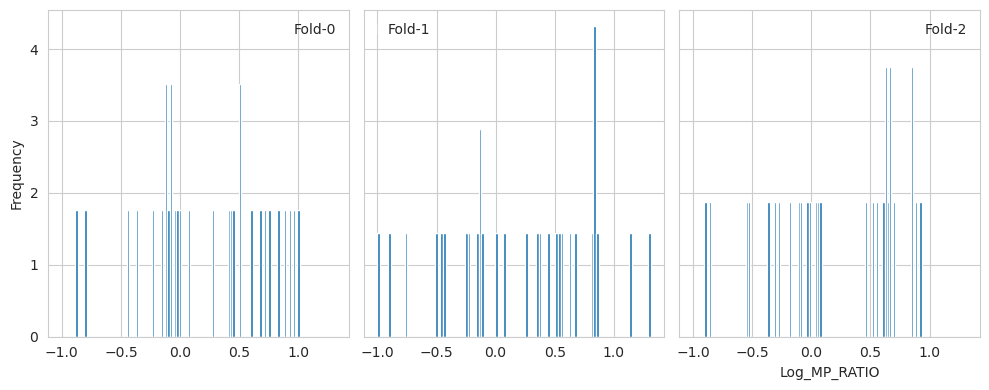

[12:33:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[12:33:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[12:33:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[12:33:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[12:33:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[12:33:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1685694755225/work/src/learner.cc:767: 
Parameters: { "max_iter" } are not used.

[12:33:11] WARNING: /home/conda/feedstock_root

In [11]:
test_utils = utils.Utils(neutral_train)
test_utils.create_cv_folds(display=True)
test_utils.display_score(XGBRegressor(max_iter=100000, random_state=0), X_neutral_train, y_neutral_train, X_neutral_test, y_neutral_test)

In [23]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
    }



    clf = XGBRegressor(random_state=0, **param)
    clf.fit(X_neutral_train, y_neutral_train)

    estimator = utils.Utils(neutral_train)
    return estimator.cross_value_score(clf)
    # score = cross_val_score(clf, X_full_train, y_full_train, scoring="r2", cv=3, n_jobs=-1).mean()
    # return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000, n_jobs=-1, show_progress_bar=True)
trial = study.best_trial
print(trial.value, trial.params)

[I 2023-06-19 14:39:30,778] A new study created in memory with name: no-name-e53038a6-b915-4513-832e-4d16f4eed2a1


  0%|          | 0/1000 [00:00<?, ?it/s]

[I 2023-06-19 14:39:48,049] Trial 7 finished with value: -0.02055224161567522 and parameters: {'max_depth': 2, 'learning_rate': 0.8796958028063633, 'n_estimators': 295, 'min_child_weight': 7, 'gamma': 0.3501948892421071, 'subsample': 0.07113068710346676, 'colsample_bytree': 0.6818354036719959, 'reg_alpha': 0.6702165926671237, 'reg_lambda': 0.5680090663201538}. Best is trial 7 with value: -0.02055224161567522.
[I 2023-06-19 14:39:48,787] Trial 4 finished with value: 0.5679231368146015 and parameters: {'max_depth': 7, 'learning_rate': 0.1651993393607415, 'n_estimators': 303, 'min_child_weight': 7, 'gamma': 0.9045177417561234, 'subsample': 0.39734143976239944, 'colsample_bytree': 0.6146834141618749, 'reg_alpha': 0.9369432916646049, 'reg_lambda': 0.22000684426902353}. Best is trial 4 with value: 0.5679231368146015.
[I 2023-06-19 14:39:52,567] Trial 5 finished with value: 0.429018020926366 and parameters: {'max_depth': 1, 'learning_rate': 0.8986267804625722, 'n_estimators': 414, 'min_child_

Scores: 
	R2				:	 0.9116863901997608 
	CV train		:	 0.5714821647348289 
	Custom CV train	:	 0.7070564839280941 
	Q2				:	 0.09704720473841266


/home/penpen/Documents/Cours/Stage/QSAR/code/wrapper/utils.py:228: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.



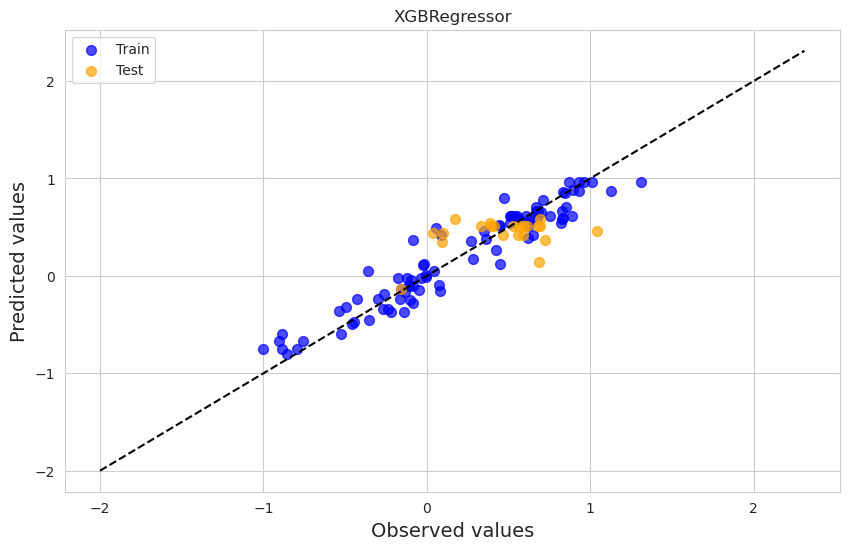

In [24]:
test_utils.display_score(XGBRegressor(**study.best_params, random_state=0), X_neutral_train, y_neutral_train, X_neutral_test, y_neutral_test)
display(plot_optimization_history(study))

rr = XGBRegressor(**study.best_params, random_state=0).fit(X_neutral_train, y_neutral_train)

test_utils.display_graph(rr, X_neutral_train, X_neutral_test, y_neutral_train, y_neutral_test)